In [1]:
#CARGA DE PAQUETES
import cv2
import pytesseract
import matplotlib.pyplot as plt 
#para uso en windows 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


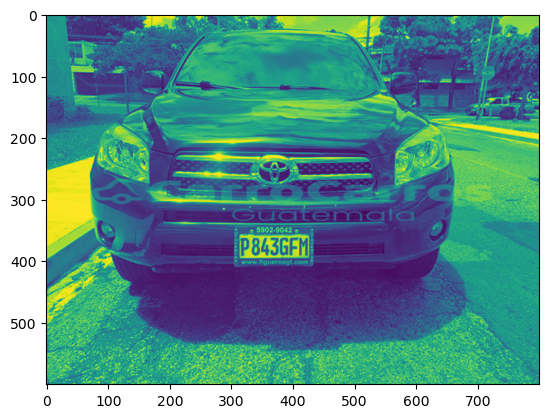

In [2]:
placa = []
image = cv2.imread('./imagenes/big_with_watermark_3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [3]:
thresholder = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]


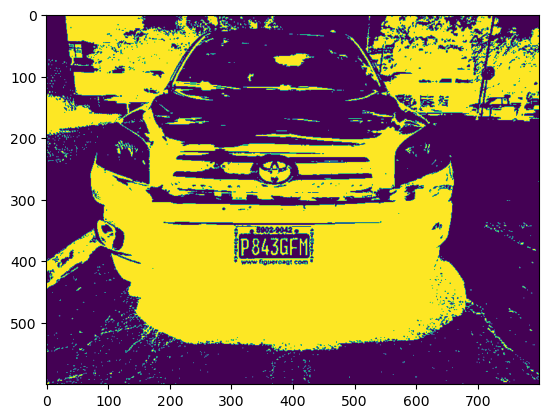

In [4]:
plt.imshow(thresholder)

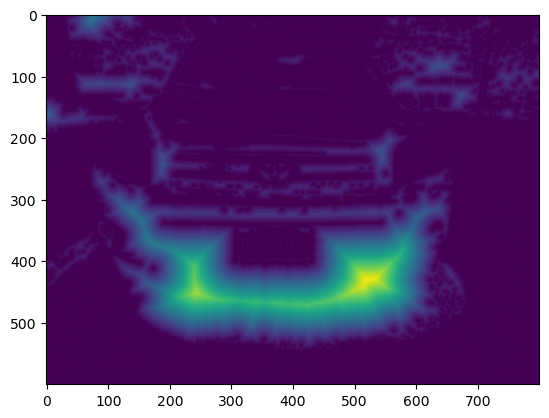

In [5]:
dist = cv2.distanceTransform(thresholder, cv2.DIST_L2,5)
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist  = (dist*255).astype('uint8')
plt.imshow(dist)

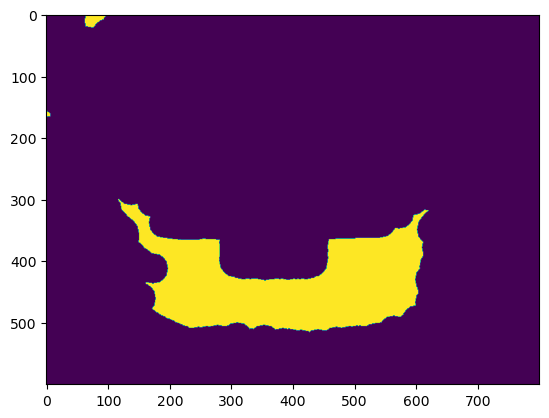

In [6]:
dist = cv2.threshold(dist, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(dist)

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
opening = cv2.morphologyEx(dist,cv2.MORPH_OPEN,kernel)

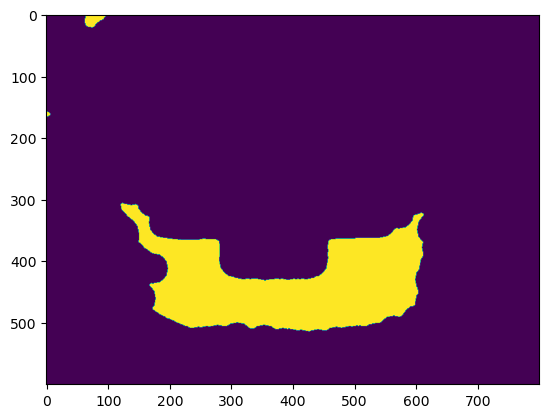

In [8]:
plt.imshow(opening)

In [9]:
import imutils

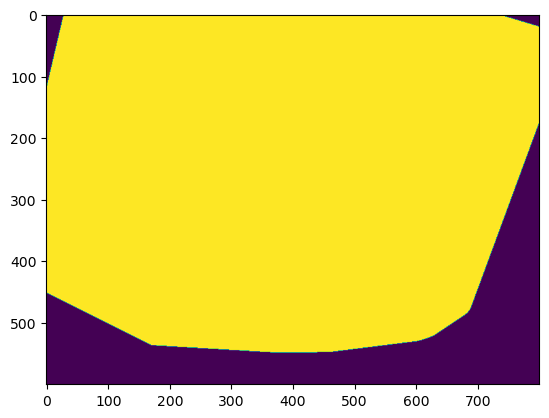

In [10]:
contours = cv2.findContours(thresholder, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

chars = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Solo los contornos grandes perdurarán, ya que corresponden a los números que nos interesan.
    if w >= 50 and h >= 100:
        chars.append(contour)

import numpy as np
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

# Creamos una máscara y la alargamos.
mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.drawContours(mask, [hull], -1, 255, -1)
mask = cv2.dilate(mask, None, iterations=2)
plt.imshow(mask)

# Aplicamos la máscara para aislar los números del fondo.
final = cv2.bitwise_and(opening, opening, mask=mask)

In [11]:
options = '-c tessedit_char_whitelist=0123456789'
text = pytesseract.image_to_string(final, config=options)
print(text)

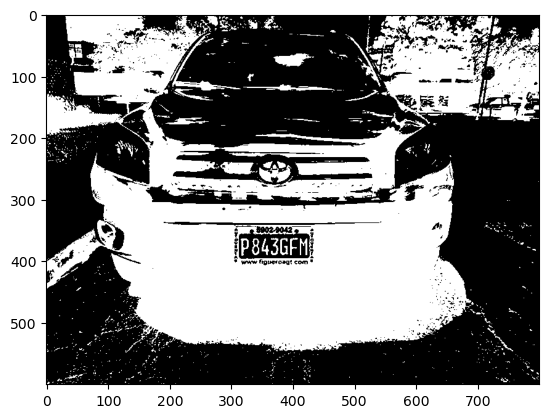

In [12]:
gray = cv2.blur(thresholder,(3,2))
#canny lo paso a negro y resalto los bordes 
canny = cv2.Canny(gray,180,300)
canny = cv2.dilate(thresholder,None,iterations=1)
plt.imshow(thresholder,cmap='gray');

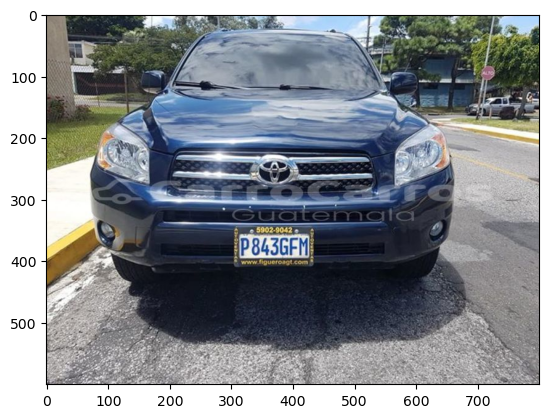

In [13]:
#Deteccion de contornos con openCV4 
contorno, _ = cv2.findContours(canny, cv2.RETR_LIST,
                              cv2.CHAIN_APPROX_SIMPLE) #CHAIN APROX SIMPLE DETECTA LINEAS IZQ Y DER
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));

In [14]:
for c in contorno:
    area = cv2.contourArea(c)
    #print(area) #imprime todas las areas que se encuentran en la imagen 
    x,y,w,h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    if len(approx) == 4 and area > 1000:
        print('area:',area)
        print('w:',w)
        print('h:',h)
        aspect_ratio = float(w)/h
        print('Relacion de aspecto', aspect_ratio)
        cv2.drawContours(image,[approx],0,(0,255,0),3)#generamos linea y luego colocamos en la imagen xd 
        if aspect_ratio > 0:
            placa = gray[y:y+h, x:x+w]
            text = pytesseract.image_to_string(placa,config = '--psm 11').strip() #pystesseract lee lo de la imagen
            print('PLACA:', text) 
            cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0),3)
            cv2.putText(image,text, (x-20, y-10),1,2.2,(0,255,0),3)

area: 4347.0
w: 115
h: 47
Relacion de aspecto 2.4468085106382977
PLACA: P843GFN


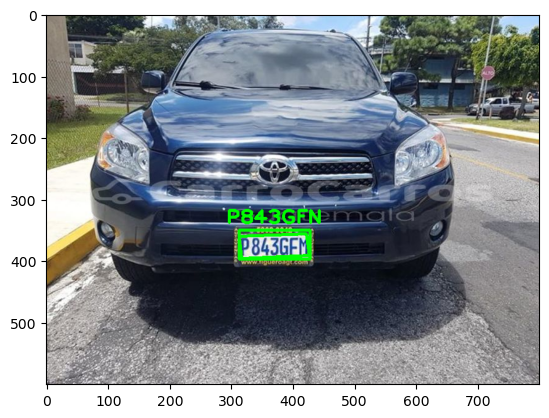

In [15]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) ## muestra las lineas del contorno de la placa